<a href="https://colab.research.google.com/github/SagarNikam09/Task_CB_ai/blob/main/Task_CB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Section A
Q1]

In [2]:
import pandas as pd
import numpy as np

In [3]:
def data_cleanup_summary(csv_file_path):

    try:
        df = pd.read_csv(csv_file_path)
        print("Original data:")
        print(df.head())
        print(f"\nMissing values:\n{df.isnull().sum()}")

        numeric_columns = ['Math', 'Science', 'English']
        for col in numeric_columns:
            if col in df.columns:
                df[col] = df[col].fillna(df[col].mean())

        if 'Gender' in df.columns:
            df['Gender_Binary'] = df['Gender'].map({'Male': 1, 'Female': 0})
            df['Gender_Binary'] = df['Gender_Binary'].fillna(
                df['Gender'].apply(lambda x: 1 if str(x).lower().startswith('m') else 0)
            )

        summary = df.groupby('Gender')[numeric_columns].mean().round(2)

        print("\nCleaned data:")
        print(df.head())
        print(f"\nSummary by Gender:")
        print(summary)

        return summary

    except FileNotFoundError:
        print(f"File {csv_file_path} not found. Creating sample data for demonstration...")


In [20]:
data_cleanup_summary('student_data.csv')

Original data:
   Unnamed: 0     Name  Math  Science  English  Gender  Gender_Binary
0           0    Alice  85.0     88.0     90.0  Female              0
1           1      Bob  90.0     87.6     87.0    Male              1
2           2  Charlie  88.4     85.0     89.0    Male              1
3           3    Diana  88.0     90.0     89.0  Female              0
4           4      Eve  92.0     89.0     91.0  Female              0

Missing values:
Unnamed: 0       0
Name             0
Math             0
Science          0
English          0
Gender           0
Gender_Binary    0
dtype: int64

Cleaned data:
   Unnamed: 0     Name  Math  Science  English  Gender  Gender_Binary
0           0    Alice  85.0     88.0     90.0  Female              0
1           1      Bob  90.0     87.6     87.0    Male              1
2           2  Charlie  88.4     85.0     89.0    Male              1
3           3    Diana  88.0     90.0     89.0  Female              0
4           4      Eve  92.0     89.0

,Math,Science,English
Gender,,,
Female,88.33,89.0,90.0
Male,88.47,86.2,88.0


Q2]

In [21]:
def dictionary_stats(user_scores_dict):

    result = {}

    for user, scores in user_scores_dict.items():
        result[user] = {
            'average': np.mean(scores),
            'min': np.min(scores),
            'max': np.max(scores)
        }

    return result

#Section B
Q3]

In [22]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix, mean_absolute_error

Iris Classification Results:
Accuracy: 1.0000


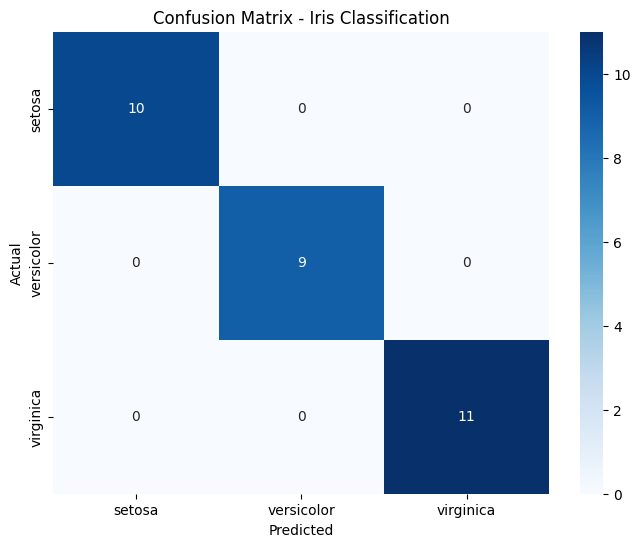

In [23]:
iris = load_iris()
X, y = iris.data, iris.target

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Decision Tree classifier
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train, y_train)

# Predict and calculate accuracy
y_pred = dt_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f"Iris Classification Results:")
print(f"Accuracy: {accuracy:.4f}")


plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=iris.target_names,
            yticklabels=iris.target_names)
plt.title('Confusion Matrix - Iris Classification')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


Q4]

In [24]:
from sklearn.linear_model import LinearRegression


Housing data loaded:
   Unnamed: 0  area  bedrooms   price
0           0  1799         4  302105
1           1  1545         3  269033
2           2  1859         3  284807
3           3  2209         5  461661
4           4  1506         3  241147
Sample housing data created:
          area  bedrooms          price
0  1748.357077         1  205822.655497
1  1430.867849         5  219588.898172
2  1823.844269         1  207074.448203
3  2261.514928         3  237061.547581
4  1382.923313         2  143268.742771

Linear Regression Results:
Mean Absolute Error: $21,260.01


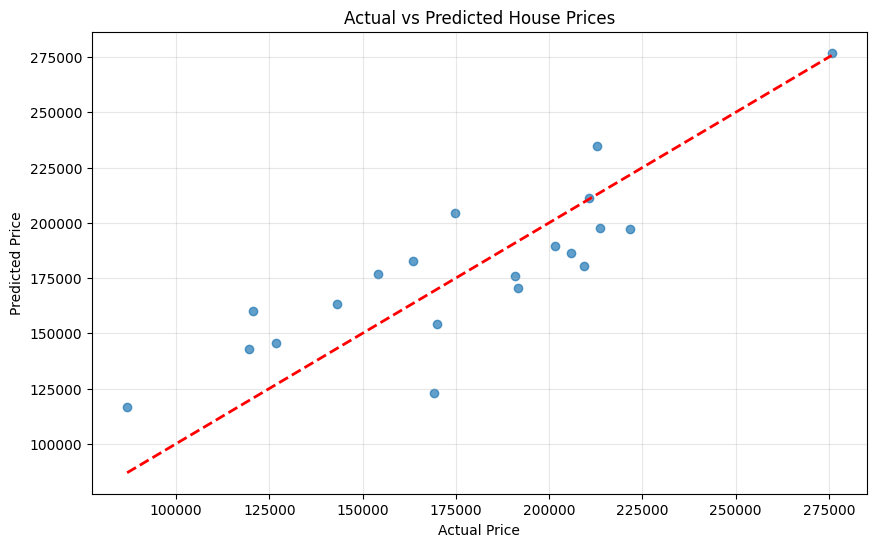

In [25]:
# Load the CSV file
df = pd.read_csv('house_data.csv')
print("Housing data loaded:")
print(df.head())

np.random.seed(42)
n_samples = 100
area = np.random.normal(1500, 500, n_samples)
bedrooms = np.random.randint(1, 6, n_samples)
# Price roughly correlated with area and bedrooms
price = area * 100 + bedrooms * 10000 + np.random.normal(0, 20000, n_samples)

df = pd.DataFrame({
    'area': area,
    'bedrooms': bedrooms,
    'price': price
})
print("Sample housing data created:")
print(df.head())

# Prepare features and target
X = df[['area', 'bedrooms']]
y = df['price']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build and train linear regression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Make predictions
y_pred = lr_model.predict(X_test)

# Calculate Mean Absolute Error
mae = mean_absolute_error(y_test, y_pred)
print(f"\nLinear Regression Results:")
print(f"Mean Absolute Error: ${mae:,.2f}")

# Plot actual vs predicted prices
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted House Prices')
plt.grid(True, alpha=0.3)
plt.show()


#Section C
Q5]

1. What is overfitting in machine learning?
  
>Overfitting occurs when a model learns the training data too well, including noise, making it perform poorly on new, unseen data.

2. When would you use a decision tree over logistic regression?
    
>Use decision trees when you need interpretable rules and can handle non-linear relationships; use logistic regression for linear relationships and when you need probability estimates.

3. Explain the train-test split and why it’s important.

>Train-test split separates data for training and evaluation, ensuring we test the model's performance on unseen data to detect overfitting.

4. What’s the purpose of normalization?


> Normalization scales features to similar ranges, preventing features with larger scales from dominating the model and improving convergence.



5. What’s the difference between classification and regression?

>Classification predicts discrete categories, while regression predicts continuous numerical values.

q6]

In [17]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [19]:
categories = ['rec.autos', 'comp.sys.mac.hardware']
newsgroups_train = fetch_20newsgroups(subset='train', categories=categories,
                                     shuffle=True, random_state=42)
newsgroups_test = fetch_20newsgroups(subset='test', categories=categories,
                                    shuffle=True, random_state=42)

vectorizer = TfidfVectorizer(max_features=10000, stop_words='english')
X_train = vectorizer.fit_transform(newsgroups_train.data)
X_test = vectorizer.transform(newsgroups_test.data)

y_train = newsgroups_train.target
y_test = newsgroups_test.target

lr_classifier = LogisticRegression(random_state=42, max_iter=1000)
lr_classifier.fit(X_train, y_train)

y_pred = lr_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f"\nNLP Classification Results:")
print(f"Accuracy: {accuracy:.4f}")

feature_names = vectorizer.get_feature_names_out()

print("\nMost important words per class:")
for i, category in enumerate(categories):
    top_indices = lr_classifier.coef_[0].argsort()[-5:][::-1] if i == 0 else lr_classifier.coef_[0].argsort()[:5]
    top_words = [feature_names[idx] for idx in top_indices]
    print(f"{category}: {', '.join(top_words)}")


NLP Classification Results:
Accuracy: 0.9821

Most important words per class:
rec.autos: car, com, cars, engine, oil
comp.sys.mac.hardware: mac, apple, monitor, scsi, quadra
